In [66]:
from IPython.display import HTML

This Jupyter Notebook is a Resource produced by HiPy for Physics students at the University of Liverpool. </p>
<img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F72840595%2F64322285113%2F1%2Foriginal.20190914-061706?w=800&auto=compress&rect=0%2C0%2C860%2C430&s=9df0b24f82d668962e4f32d511ebb7ee"
style="width: 500px">

## Need Python Support? Come and join the Hive.

Register for free at the dates below:

  + [Wed 25 Sep 2019](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  + [Wed 30 Oct 2019](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  + [Wed 27 Nov 2019](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  + [Wed 29 Jan 2020](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  + [Wed 26 Feb 2020](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  + [Wed 25 Mar 2020](https://www.eventbrite.com/e/hipy-tickets-48282771068)
  

# HiPy for Physicists | X-Ray Fluorescence Data Analysis Workshop
University of Liverpool 2019/20

R. Treharne

## Step 1: Reading data from an Excel spreadsheet

All the data files you need for this exercise are available, for free and forever, at [github.com/rtreharne/XRF](https://github.com/rtreharne/XRF)

I'm going to use the amazing Pandas module to read and handle my Excel data. For a more gentle introduction to Pandas, NumPy and importing files checkout the following [HiPy](http://www.hipy.uk) resources:

  + [Importing Data From Files](https://github.com/HiPyLiv/HiPyProject/blob/master/%5BSOURCING%5D%20Importing%20Data%20From%20Files/Importing%20Files%20From%20Files.ipynb)
  + [NumPy and Pandas](https://github.com/HiPyLiv/HiPyProject/blob/master/%5BBASICS%5D%20Numpy%20and%20Pandas/Numpy%20and%20Pandas.ipynb)
  
Make sure your excel file is in the same directory that you're running your notebook from.

In [67]:
# Step 1 video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Qs_16PFiTbc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [68]:
# Import the modules you're going to need
# Pandas, NumPy and Matplotlib are classics!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Read your excel file. 
# Pandas, by default, tries to assign the first row 
# of a file as column names of the data frame. 
# You don't want this so use 'header=None'
# Also by default, Pandas will read the data in the first
# sheet of your spreadsheet. Specify the sheet explicitly
# using 'sheet_name'

df = pd.read_excel("xrf_test_data.xlsx", header=None, sheet_name="Copper")

In [70]:
# To view the data in your notebook simply uncomment and run
# the line below.

#df

In [71]:
# You can see that the data frame containes two sets of XRF data,
# Both for copper but at different Gains.
# You want to get the x and y data out for each scan right?
# You can use Pandas' '.iloc' method to isolate the data as follows.

cu_1 = df.iloc[10:, :2]
cu_2 = df.iloc[10:, 3:]

# This will create two new subset dataframes f, cu_1 and cu_2,from df
# that contain x and y data for each of the scans respectively.

## Step 2: Plotting

There are a zillion ways to generate data plots using Python. I'm going to stick the using the classic Matplotlib module. For more resources on visualisation in Python check out the following HiPy notebooks:

  + [A deeper look at Matplotlib](https://github.com/HiPyLiv/HiPyProject/tree/master/%5BVISUALISATION%5D%20A%20Deeper%20Look%20Into%20Matplotlib)
  + [Pandas build in Vis](https://github.com/HiPyLiv/HiPyProject/tree/master/%5BVISUALISATION%5D%20Panda's%20Built%20In%20Vis)
  + [Statistical plottPng With Seaborn](https://github.com/HiPyLiv/HiPyProject/tree/master/%5BVISUALISATION%5D%20Statistical%20Plotting%20With%20Seaborn)
  + [Interactive Plots With Bokeh](https://github.com/HiPyLiv/HiPyProject/tree/master/%5BVISUALISATION%5D%20Interactive%20Plots%20With%20Bokeh)
  
Also, you can access plenty of documentation and examples for Matplotlib at [matplotlib.org](https://matplotlib.org/)

In [72]:
# Step 2 video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UvCh0_rMF4w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

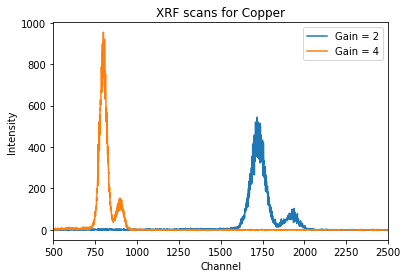

In [73]:
# First lets's format the x and y column data in
# our dataframes into seperate lists. This will 
# make plotting much easier. The 'tolist()' Pandas 
# method comes in handy here.

# Get the x/y data for Copper, gain=2
x1 = np.array(cu_1[0].tolist())
y1 = np.array(cu_1[1].tolist())

# Get the x/y data for Copper, gain=4
x2 = cu_2[3].tolist()
y2 = cu_2[4].tolist()

# Create a matplotlib figure and axis
fig, ax = plt.subplots()

# Plot your data to your axis.
# Don't forget to label your data.
ax.plot(x1, y1, label='Gain = 2')
ax.plot(x2, y2, label = 'Gain = 4')

# Adjust your x-axis accordingly.
ax.set_xlim(500, 2500)

# Set your axis labels and figure title.
ax.set_xlabel('Channel')
ax.set_ylabel('Intensity')
ax.set_title('XRF scans for Copper')

# Add the legend
ax.legend()

# If you need to save your plot then uncomment
# and use the line below.
# fig.savefig("Copper.eps", format="eps")

# You must use the line below to display the figure object.
plt.show()

## Step 3a: Fitting

We need to determine the peak locations (with respect to channel).

### Why?

The large and small peak locations in a given spectra correspond to K_alpha and K_beta lines of the material respectively (which we can lookup). If we can determine the channel locations of peaks for all of the materials in our dataset, compare them to published K values, and generate a plot of Channel vs Energy we can callibrate our spectrometer. Then we can scan any unknown material and calculate K_alpha, K_beta for any 'unknonwn' material in units of energy (keV).

### How?

We can use a Gaussian curve shape to describe each of the peaks:

$$G(A, x_0, \sigma) = \frac{A}{\sqrt\pi\exp\frac{(x-x_0)^2}{2\sigma^2}}$$

Where $A$, $x_0$ and $\sigma$ are the amplitude, mean and standard deviation of the distribution resptively.

In [74]:
# Step 3 video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/lSiQ-seTkVU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [75]:
# Lets write a function that returns the Gaussian above

def gaussian(x, *params):
    """
    x must be an array
    params must be an array of A, x0 and sigma values
    returns an array same length as x
    """
    A = params[0]
    x0 = params[1]
    sigma = params[2]
    
    return A/(np.sqrt(np.pi)*np.exp((x-x0)**2/(2*sigma**2)))
    

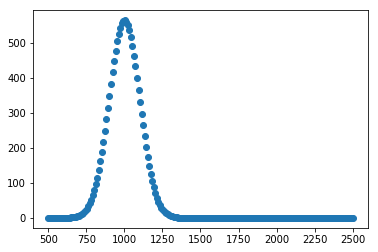

In [76]:
# Test out the function above by giving it an array of x values
x = np.linspace(500, 2500, 200)
y = gaussian(x, 1000, 1000, 100)

# plot x and y
# I'm not goint to bother creating matplotlib fig object for this
plt.scatter(x, y)
plt.show()

Let's look at our XRF scan for copper again (see step 2). For a gain = 2 let's see if we can fit the kalpha peak with a single gaussian.

Read the documentation on the scipy.optimize.curve_fit [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [77]:
import warnings; warnings.simplefilter('ignore')

# Let's guess the A, x0 and sigma values for this peak. It doesn't matter if we're completely wrong.

guess1 = [500, 1700, 50]

# I'm going to use the scipy.optimize.curve_fit method of scipy's optimise package.
# This method will return two lists:
#   + The optimized gaussian parameters for the fit 
#   + The covariance values of the optimized parameter values (don't worry too much about this)

# Don't forget to import the necessay module
from scipy import optimize

popt, pcov = optimize.curve_fit(gaussian, x1, y1, p0=guess1)

# What does popt look like?
# Does the value for x0 look about right?
popt

array([  758.63811223,  1722.9671822 ,    43.29766248])

Let's check how well this fit looks by ploting our data as a scatter plot and our fit as a line on the same axis.

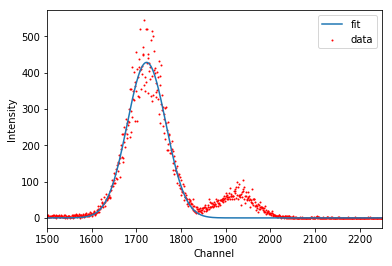

In [78]:
# create figure and axis
fig, ax = plt.subplots()

# plot the data as a scatter plot
ax.scatter(x1, y1, s=1, label='data', color='r')

# Let's zoom in a bit by truncating our x-axis
ax.set_xlim(1500, 2250)

# Add our fitted gaussian to the plot
ax.plot(x1, gaussian(x1, *popt), label='fit')

# Don't forget to set your axis labels!!!! I will find you if you don't.

ax.set_xlabel('Channel')
ax.set_ylabel('Intensity')

ax.legend()

plt.show()

OK, this looks pretty good. I would certainly trust the fitted value of $1720\pm42$ for $x_0$ of the kalpha peak. But what about the kbeta peak? Can I fit this the same way? Let's try by feeding in a new guess, this time for our kbeta peak.

In [79]:
guess2 = [250, 1900, 50]

popt, pcov = optimize.curve_fit(gaussian, x1, y1, p0=guess1)

# What does popt look like?
# Does the value for x0 look about right?
popt

array([  758.63811223,  1722.9671822 ,    43.29766248])

Uh Oh. It's given us the same fitted values for $A$, $x_0$ and $\sigma$ as when fitting the kalpha peak. Because the kalpha peak dominates fitting with a single gaussian will always return the popt for the kalpha.

## Step 3b: Fitting two Gaussians simultaneously

Let's extend our original "gaussian" function above creating a function that returns distribution of TWO summed gaussian lineshapes. Then, let's feed it some parameter values for A, x0 and sigma for the respective gaussians and use this to fit the data.

In [80]:
def two_gaussians(x, *params):
    
    # declare variables for each of the gaussian functions.    
    A_1, x0_1, sigma_1, A_2, x0_2, sigma_2 = params
    
    # calculate the independent gaussian lineshapes
    gauss1 = A_1**2/(np.sqrt(np.pi)*np.exp((x-x0_1)**2/(2*sigma_1**2)))
    gauss2 = A_2**2/(np.sqrt(np.pi)*np.exp((x-x0_2)**2/(2*sigma_2**2)))
    
    # return their sum    
    return gauss1 + gauss2

N.B. The * in front of the 'params' in the function above is very important. [Read why in this article](https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558)

Now we can try and fit both kalpha and kbeta peaks to our copper spectrum (gain = 2) simultaneously ...

In [81]:
# our 'guess' array is now twice as long because we've
# got values for two gaussians in there
guess = [1000, 1700, 100, 500, 1900, 100]

# fun the curve_fit method again, don't forget to use your new n_gaussians function
popt, pcov = optimize.curve_fit(two_gaussians, x1, y1, guess)

print(popt)
# popt now gives accurate value for kbeta peak

[   27.59277728  1722.8103222     42.92045148    10.9081412   1922.44717941
    43.63422099]


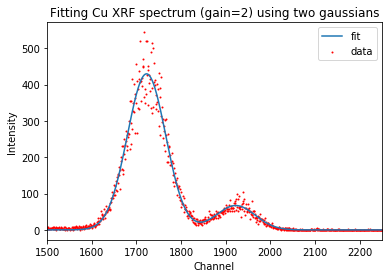

In [82]:
# Plotting Cu data again with two gaussian fit

fig, ax = plt.subplots()
ax.scatter(x1, y1, s=1, color='r', label='data')
ax.set_xlim(1500, 2250)
ax.plot(x1, two_gaussians(x1, *popt), label='fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Intensity')
ax.set_title('Fitting Cu XRF spectrum (gain=2) using two gaussians')

ax.legend()
plt.show()

This looks much better, right? Remember the important parameters that we are interested in (with respect to making a calibration of 'channel' against energy) is the peak location. popt spits out values of 1723 and 1922 (4.sf) for the kalpha and kbeta peaks respecitvely.

<b>But error should you associate with these values?</b> Well, it's pretty common to express this error as +/ the full width half maximum, FWHM, value of the gaussian. Did you know you can calculate the FWHM from the curve's standard deviation? Go on, Google it. I dare you.

## Part 4: Putting it all together and generating a summary table

OK, we're looking good. Now lets put the above together using a couple of functions that fit all the data in a given sheet

In [83]:
def fit_sheet(fname, sheet, guess, check=False, save=False):
    
    """
    This function will return a list of peaks fitted from 
    all spectra in a given sheet in the following format
    [
      ...
      [x0, sigma, gain, material, kalpha/kbeta]
      ...
    ]
    """
    # Read the sheet into a dataframe
    df = pd.read_excel(fname, header=None, sheet_name=sheet)
    
    # get rid of all columns and rows in dataframe that are empty or are NaN
    df = df.dropna(axis = 'columns', how='all').dropna(how='all')
    
    # define an empty list (your fitted peak info will go in here)
    peak_info = []
    
    # OK. This is the messy bit
    # The following loop exracts the scan parameter info
    # as well as getting the x and y data for scans on the same 
    # material but at various gains
    
    for i in range(0, len(df.columns), 2):
        gain = df.iloc[4, i+1]
        kalpha = df.iloc[1, i+1]
        kbeta = df.iloc[2, i+1]
        x = np.array(df.iloc[10:, i].fillna(0).tolist())
        y = np.array(df.iloc[10:, i+1].fillna(0).tolist())
        
        # create a figure
        fig, ax = plt.subplots()
        
        # plot the data from a single scan
        ax.scatter(x, y, s=1, color='r', label='data')
        
        # instantiate an empty list for the current scan data        
        peaks = []
        
        # see if you can fit the data using the init parameters
        try:        
            popt, pcov = optimize.curve_fit(two_gaussians, x, y, guess)
            
            # add your fitted gaussian to the figure
            ax.plot(x, two_gaussians(x, *popt), label='fit')
            
            # Add the optimised peak locations for kalpha and kbeta to your peaks list
            for i, j in enumerate(range(0, len(popt), 3)):
                peaks.append([popt[j+1], np.sqrt(popt[j+2]**2)])

            # Make sure that you correctly identify the peaks as kalpha or kbeta
            if peaks[0][0] < peaks[1][0]:
                peaks[0] += [kalpha, 'kalpha']
                peaks[1] += [kbeta], 'kbeta'

            else:
                peaks[0] += [gain, kbeta, sheet, 'kbeta']
                peaks[1] += [gain, kalpha, sheet, 'kalpha']
                
        except:
            print("Couldn't fit")

        # Add peaks info to parent list
        peak_info += peaks
        
        # label figure
        ax.set_xlabel('Channel')
        ax.set_ylabel('Intensity')
        ax.set_title('Fitting {0} XRF spectrum (gain={1})'.format(sheet, gain))
        ax.set_xlim(200, 3000)

        ax.legend()
        
        # saving (if save = True)
        if save:
            fig.savefig("{0}_gain_{1}.eps".format(sheet, gain), format='eps')
        
        #checking (if check = True)
        if check:
            plt.show()
    
    # returns all the peak info from scans at ALL gains
    return peak_info  

I can now chuck the sheet name and my two gaussian initial parameter guesses into the function above and it will spit out a list of all peak locations, for each gain setting used and correctly label the peaks as the kalpha or kbeta lines.

In [84]:
fname = "xrf_test_data.xlsx"

In [85]:
zinc = fit_sheet(fname, 'Zinc', guess = [400, 800, 10, 400, 1000, 100])

In [86]:
iron = fit_sheet(fname, 'Iron', guess = [400, 800, 10, 400, 900, 100])

In [87]:
nickel = fit_sheet(fname, 'Nickel', guess = [400, 800, 10, 400, 900, 100])

In [88]:
summary_table = pd.DataFrame(zinc+iron+nickel, columns=['x0', 'sigma', 'gain', 'keV', 'material', 'line'])

In [89]:
summary_table['FWHM'] = 2*np.sqrt(2*np.log(2))*summary_table['sigma']

In [90]:
summary_table

,x0,sigma,gain,keV,material,line,FWHM
0,976.870886,22.059942,2,9.57,Zinc,kbeta,51.947193
1,867.825450,21.151098,2,8.63,Zinc,kalpha,49.807028
2,2079.425881,43.721577,4,9.57,Zinc,kbeta,102.956445
3,1860.867739,43.218235,4,8.63,Zinc,kalpha,101.771167
4,682.191922,20.798065,2,7.06,Iron,kbeta,48.975701
5,607.381365,21.010754,2,6.40,Iron,kalpha,49.476546
6,1491.709183,40.886551,4,7.06,Iron,kbeta,96.280470
7,1338.956819,41.918679,4,6.40,Iron,kalpha,98.710945
8,823.258975,21.174562,2,8.26,Nickel,kbeta,49.862283
9,732.260119,21.351031,2,7.47,Nickel,kalpha,50.277836


Brill. I've summarized all my fits into a single dataframe. Now I can plot channel peak locations against the known energies to create a callibration curve.

Oh, BTW. Did you know how easy it was to save a pandas data frame to an excel spreasheet?

In [91]:
summary_table.to_excel("XRF_summary_table.xlsx")

# Part 5: Creating a callibration curve and fitting your data

Here are some links to additional jupyter notebooks on fiting data and using $\chi^2$ which you will find useful.

+ [The Chi Squared Statistic - What is it? Why is it relevant? How do I use it in my work?](https://nbviewer.jupyter.org/github/rtreharne/XRF/blob/master/Chi%20Square%20Guide.ipynb)
+ [Fitting Data - A Guide](https://nbviewer.jupyter.org/github/rtreharne/XRF/blob/master/Fitting%20Data%20-%20A%20Guide.ipynb)


In [92]:
# Let's look at the gain=2 data in the summary table above
gain_2 = summary_table[summary_table['gain']==2]

gain_4 = summary_table[summary_table['gain']==4]

We want to plot channel number of each peak (x) against the energy (in keV) ...

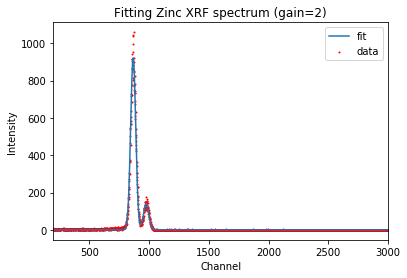

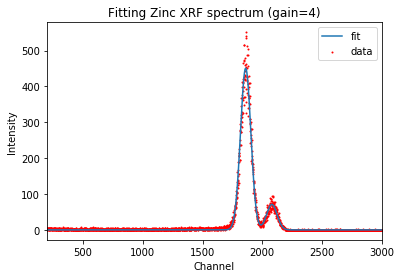

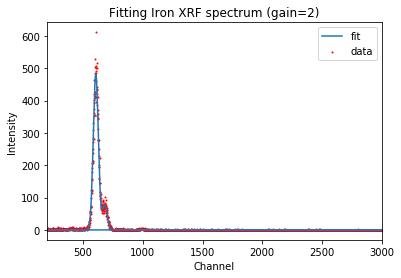

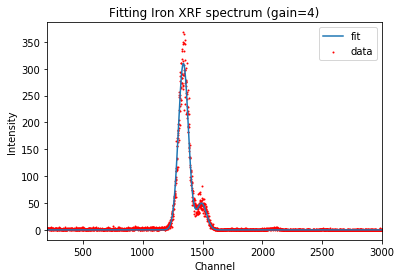

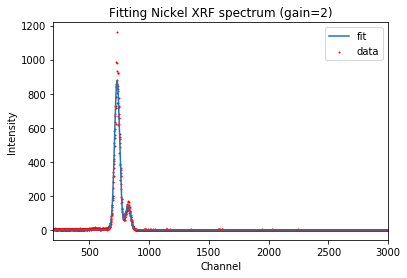

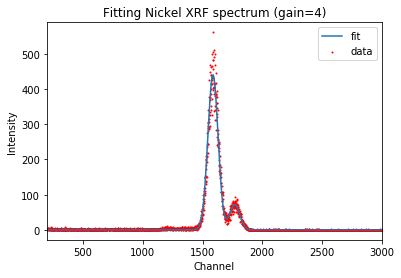

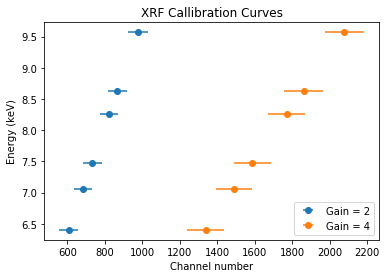

In [93]:
# get your x list
x2 = gain_2['x0']
x4 = gain_4['x0']


# use FWHM values as your xerror values
xerr2 = gain_2['FWHM']
xerr4 = gain_4['FWHM']

# get your y list
y2 = gain_2['keV']
y4 = gain_4['keV']

# create a figure
fig, ax = plt.subplots()

# To create a scatterplot with error bars use the 'errorbar' chart type from matplotlib
ax.errorbar(x2, y2, xerr=xerr2, label='Gain = 2', fmt='o')
ax.errorbar(x4, y4, xerr=xerr4, label='Gain = 4', fmt='o')

ax.set_xlabel("Channel number")
ax.set_ylabel("Energy (keV)")
ax.set_title("XRF Callibration Curves")

ax.legend()
plt.show()

Looking good! I see some linear relationships in there - this is what we dream of as scientists right?

So if, for each of the gains, there is a linear (i.e. $y=mx+c$) relationship between channel number and energy how do I fit these in Python?

Golly gosh. There must be a million ways to do this.

I use "lmfit" because I'm lazy. You will probably need to install the lmfit package if you wish to run the cells below.

Checkout the lmfit documentation at [https://lmfit.github.io/lmfit-py/model.html](https://lmfit.github.io/lmfit-py/model.html)

Do refer to the detailed guides in the links above to do this in a much more robust way.



In [94]:
# Define a function that returns a linear response according to y=mx+c
def fitFunc(x, m, c):
    y = m*np.array(x) + c
    return y

In [95]:
# import the Model class from lmfit
from lmfit import Model

# create the module using your defined linear function
linmodel = Model(fitFunc)

# fit your linear model to your data sets using guesstimates for m and c
result_gain_2 = linmodel.fit(y2, x=x2, m=0.1, c=6)
result_gain_4 = linmodel.fit(y4, x=x4, m=0.1, c=6)

# Bosh! done. If you want to see the results, i.e. your fitted parameters and your chi squared value,
# simply run the cells below

In [96]:
# result_gain_2
# result_gain_4

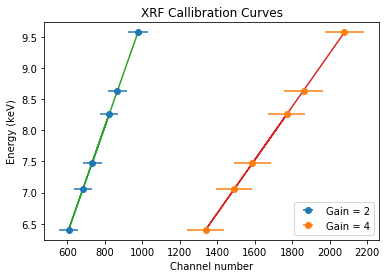

In [97]:
# Now let's creat our plots again and add the straight line fits this time

# create a figure
fig, ax = plt.subplots()

# To create a scatterplot with error bars use the 'errorbar' chart type from matplotlib
ax.errorbar(x2, y2, xerr=xerr2, label='Gain = 2', fmt='o')
ax.errorbar(x4, y4, xerr=xerr4, label='Gain = 4', fmt='o')

ax.plot(x2, result_gain_2.best_fit)
ax.plot(x4, result_gain_4.best_fit)

ax.set_xlabel("Channel number")
ax.set_ylabel("Energy (keV)")
ax.set_title("XRF Callibration Curves")


ax.legend()
plt.show()

# Challenge!

Use your knowledge to fit the peak positions of the "Unknown 1" sheet in the "XRF_test_data.xlsx"